In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from datetime import datetime as dt 
import os 

In [119]:
warnings.filterwarnings('ignore')

In [120]:
%matplotlib inline 

In [121]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'coolwarm' , font_scale = 1.1,
             rc = {'figure.figsize' : (5 , 5)})

In [122]:
df = pd.read_csv('Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


### Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.


In [124]:
df.duplicated().sum()

2

In [125]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [126]:
df.duplicated().sum()

0

### Task. 2) Is there any Null Value present in any column ? Show with Heat-map.


In [127]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

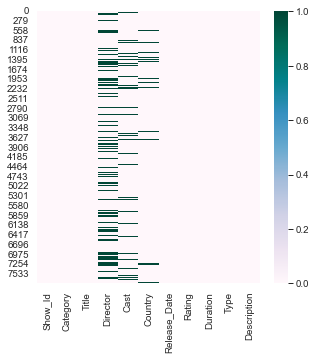

In [128]:
sns.heatmap(df.isnull() , cmap = 'PuBuGn')

### Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?


In [129]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [130]:
df[df['Title'].str.contains('House of Cards')][['Show_Id' , 'Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


### Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Graph.


In [131]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [132]:
df['Year'] = df['Release_Date'].dt.year

In [133]:
group = df.groupby('Year')['Category'].value_counts().to_frame()
group.rename(columns = {'Category' : 'Freq'} , inplace = True)
group

Freq
Year   Category      
2008.0 Movie        1
       TV Show      1
2009.0 Movie        2
2010.0 Movie        1
2011.0 Movie       13
2012.0 Movie        3
2013.0 Movie        6
       TV Show      5
2014.0 Movie       19
       TV Show      6
2015.0 Movie       58
       TV Show     30
2016.0 Movie      258
       TV Show    185
2017.0 Movie      864
       TV Show    361
2018.0 Movie     1255
       TV Show    430
2019.0 Movie     1497
       TV Show    656
2020.0 Movie     1312
       TV Show    697
2021.0 Movie       88
       TV Show     29

<AxesSubplot:xlabel='count', ylabel='Year'>

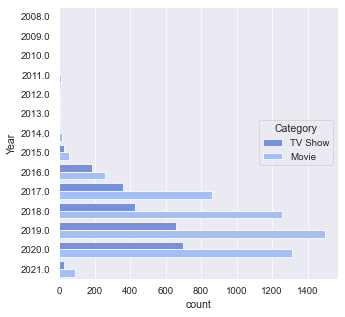

In [134]:
sns.countplot(data = df , y = 'Year' , hue = 'Category')

### Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.


In [135]:
df['Category'].value_counts().to_frame().T

,Movie,TV Show
Category,5377,2410


<AxesSubplot:xlabel='Category', ylabel='count'>

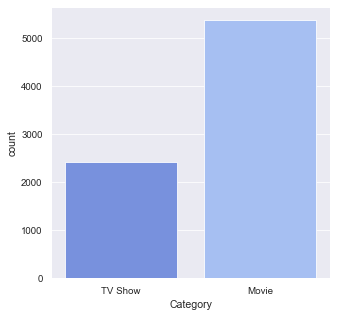

In [136]:
sns.countplot(data = df , x = 'Category')

### Q. 4) Show all the Movies that were released in year 2020.


In [137]:
df[ (df['Category'] == 'Movie') & (df['Year'] == 2020.0)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020.0
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020.0
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,2020-07-01,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7760,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,2020-05-19,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020.0
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0


### Q. 5) Show only the Titles of all TV Shows that were released in India only.


In [138]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0


In [139]:
df[ (df['Category'] == 'TV Show') & df['Country'] == 'India']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year


### Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?


In [140]:
group = df[df['Category'] == 'Movie'].groupby('Director')['Category'].value_counts().sort_values(ascending = False).to_frame().head(10)
group.rename(columns = {'Category' : 'Freq'} , inplace = True)
group.reset_index(inplace = True)

<AxesSubplot:xlabel='Freq', ylabel='Director'>

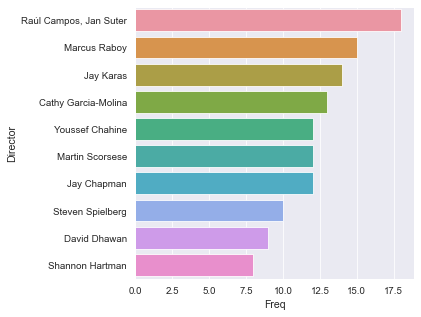

In [141]:
sns.barplot(data = group , y = 'Director' , x = 'Freq' , estimator = max)

In [142]:
group = df[df['Category'] == 'TV Show'].groupby('Director')['Category'].value_counts().sort_values(ascending = False).to_frame().head(10)
group.rename(columns = {'Category' : 'Freq'} , inplace = True)
group.reset_index(inplace = True)

<AxesSubplot:xlabel='Freq', ylabel='Director'>

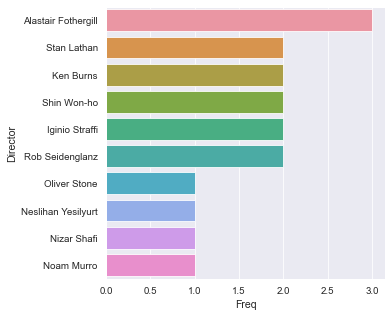

In [143]:
sns.barplot(data = group , y = 'Director' , x = 'Freq')

### Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".


In [144]:
df[ (df['Category'] == 'Movie') & (df['Type'] == 'Comedies') | (df['Country'] == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017.0
7669,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019.0
7686,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020.0
7723,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017.0


### Q. 8) In how many movies/shows, Tom Cruise was cast ?


In [145]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0


In [150]:
df_na = df.dropna()

In [151]:
df_na['Cast'].str.contains('Tom Cruise')

1       False
2       False
3       False
4       False
5       False
        ...  
7778    False
7780    False
7781    False
7782    False
7783    False
Name: Cast, Length: 4809, dtype: bool

In [152]:
df_na[ df_na['Cast'].str.contains('Tom Cruise') ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0


### Q. 9) What are the different Ratings defined by Netflix ?


In [153]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

### Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?


In [156]:
df[ (df['Category'] == 'Movie') & (df['Rating'] == 'TV-14') & (df['Country'] == 'Canada')].shape[0]

11

### Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?


In [160]:
df[ (df['Category'] == 'TV Show') & (df['Rating'] == 'R') & (df['Year'] > 2018) ].shape[0]

1

### Q. 10) What is the maximum duration of a Movie/Show on Netflix ?


In [175]:
df_movie = df[df['Category'] == 'Movie']

In [176]:
df_movie['Movie_Duration'] = df_movie['Duration'].apply(lambda x : float(x.split(' ')[0]))

In [177]:
df_movie.sort_values(ascending = False , by = 'Movie_Duration').head(1)['Title']

957    Black Mirror: Bandersnatch
Name: Title, dtype: object

In [178]:
df_show = df[df['Category'] == 'TV Show']

In [182]:
df_show['Show_Duration'] = df_show['Duration'].apply(lambda x : float(x.split(' ')[0]))

In [186]:
df_show.sort_values(ascending = False , by = 'Show_Duration').head(1)['Title']

2538    Grey's Anatomy
Name: Title, dtype: object

### Q. 11) Which individual country has the Highest No. of TV Shows ?


In [189]:
df[ df['Category'] == 'TV Show']['Country'].value_counts().index[0]

'United States'

### Q. 12) How can we sort the dataset by Year ?


In [190]:
df.sort_values(by = 'Year' , ascending = False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",2021-01-01,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021.0
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,2021-01-01,PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021.0
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,2021-01-15,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021.0
5955,s5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,2021-01-10,PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021.0
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,2021-01-12,TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN


### Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.


In [191]:
df[((df['Category'] == 'Movie') & (df['Type'] == 'Dramas')) |((df['Category'] == 'TV Show') & (df['Type'].str.contains("Kids' TV"))) ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0
108,s109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,2019-07-12,TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a...",2019.0
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020.0
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7756,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019.0
7759,s7760,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0
7766,s7767,TV Show,Zig & Sharko,NaN,NaN,France,2017-12-01,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",2017.0
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020.0
